# Homework 9: SDSS Assignment

## Taylor Spoo

Amplitude of the curvefit, a= -9.960858027124717
Period of the curvefit, b= 6.284979855076326
Phase shift of the curvefit, c= 0.38845155101336104
Vertical shift of the curvefit, d= 9.265598224139723
Munich's Overall Avg Temp: 9.261252084167237


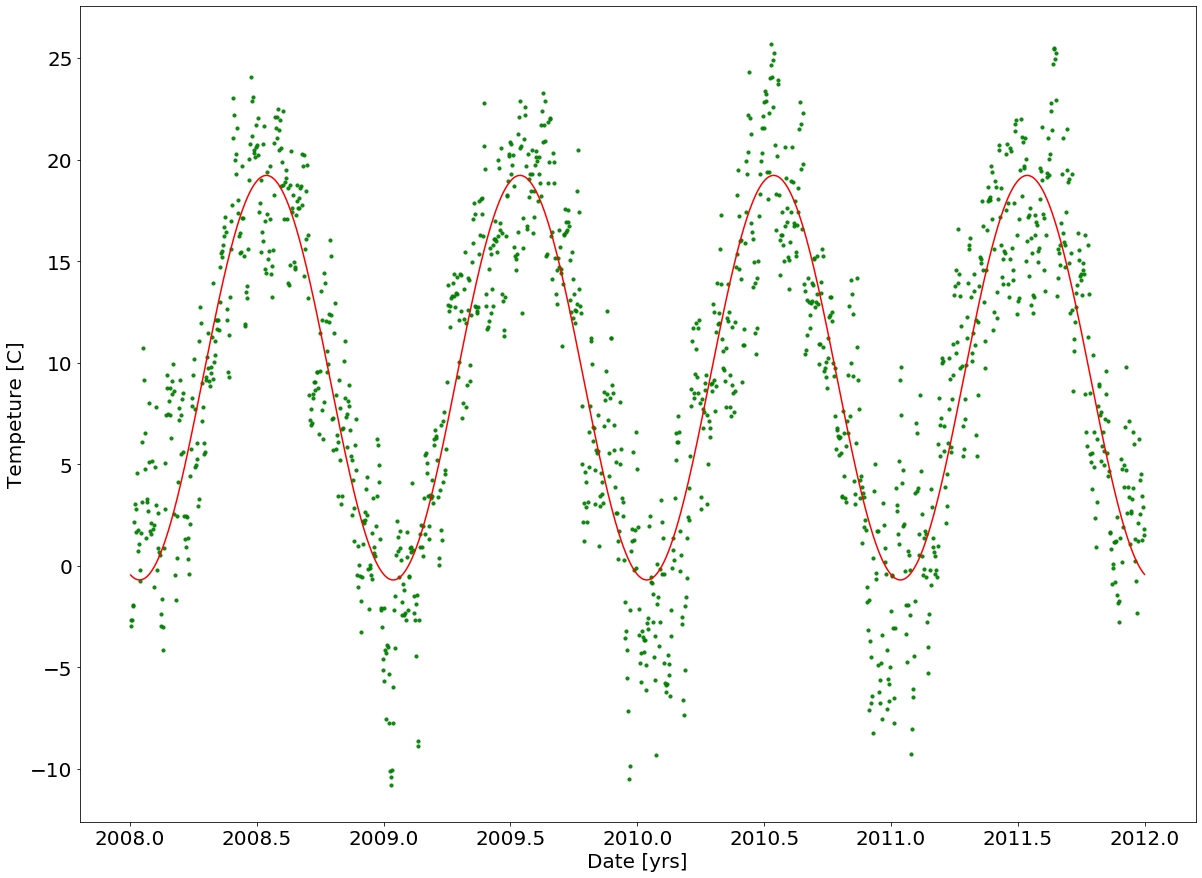

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*(x + c)) + d #I redefined the cosine fit as b*(x+c), where before it was b*x+c#

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

gd1 = (2008 < Date) & (Date < 2012) & (np.abs(Temp) < 50)
good1 = np.where(gd1)[0]

p_start = [10,2*np.pi,1,30]  #my intial guess parameters

popt,pcov = opt.curve_fit(cosfit, Date[gd1], Temp[gd1], p_start)
#print(popt)
print("Amplitude of the curvefit, a=",popt[0])
print("Period of the curvefit, b=", popt[1])
print("Phase shift of the curvefit, c=", popt[2])
print("Vertical shift of the curvefit, d=", popt[3])
print("Munich's Overall Avg Temp:", np.mean(Temp[gd1]))

#print(np.amin(np.array(Temp(gd1))))   NEED FIGURE OUT AVG COLD AND HOT TEMPS

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[gd1],Temp[gd1],s=10,c='g',alpha=0.9)
ax1.plot(Date[gd1],cosfit(Date[gd1],*popt), c='r')
ax1.set_xlabel("Date [yrs]",size=20)
ax1.set_ylabel("Tempeture [C]",size=20)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
plt.show()

In [2]:
# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
#popt,pcov  = mcFit(data['X'], data['Y'], data['X_ERR'],data['Y_ERR'])

# 3 PARAMETER MC FIT
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters =  100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y

        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]
# To run example
#popt,pcov = mcFit(poly2, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

# 4 PARAMETER MC FIT
def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]
# To run example
#popt,pcov = mcFit(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

BEST LINEAR FIT PARAMETERS:
Slope= 0.001450936441652034 $\pm$ 2.2052514082559244e-06
y-int= -4.542061053260133 $\pm$ 0.009661722265638025


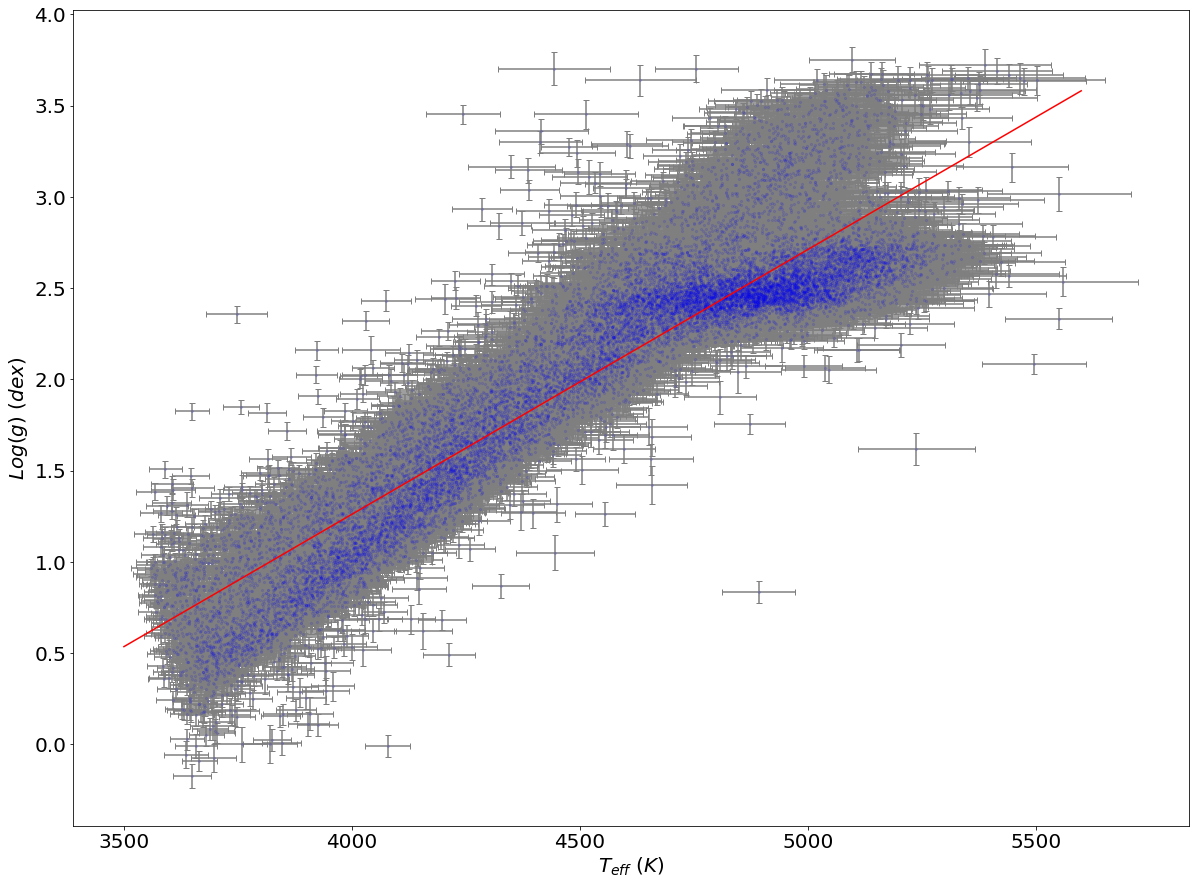

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 

teff_logg_check=np.logical_and(star["TEFF"]>0,star["LOGG"]>-10)
glat_check=np.logical_and(star["GLAT"]>-1, star["GLAT"]<1)
teff_logg_glat_check=np.logical_and(teff_logg_check,glat_check)
indices = np.where(np.logical_and(gd, teff_logg_glat_check))
good = star[indices]

#clean values without +/- 9999
Teff_vals = good["TEFF"]
Logg_vals = good["LOGG"]
Teff_err  = good["TEFF_ERR"]
Logg_err  = good["LOGG_ERR"]

#errors
popt,pcov = mcFitLine(Teff_vals, Logg_vals, Teff_err, Logg_err)
x_fitsTeff = np.arange(3500,5600,1)
print("BEST LINEAR FIT PARAMETERS:")
print("Slope=",popt[0],"$\pm$", pcov[0])
print("y-int=",popt[1],"$\pm$", pcov[1])

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
#ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)
ax.scatter(Teff_vals, Logg_vals, s=5, c="b", alpha=0.1)
ax.plot(x_fitsTeff, linear(x_fitsTeff,*popt), c='red')
ax.errorbar(Teff_vals, Logg_vals, yerr=Logg_err, xerr=Teff_err, c='tab:gray', 
            fmt='.', markersize=.5, capsize=3, zorder=0)
ax.set_xlabel("$T_{eff}$ $(K)$",size=20)
ax.set_ylabel("$Log(g)$ $(dex)$",size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

BEST Poly2 Fit PARAMETERS:
a= -0.0559970502844966 $\pm$ 0.0012715413962184538
b= -0.2651307346398238 $\pm$ 0.0009918006352757852
c= 0.04808062007186745 $\pm$ 0.00019786650597966677


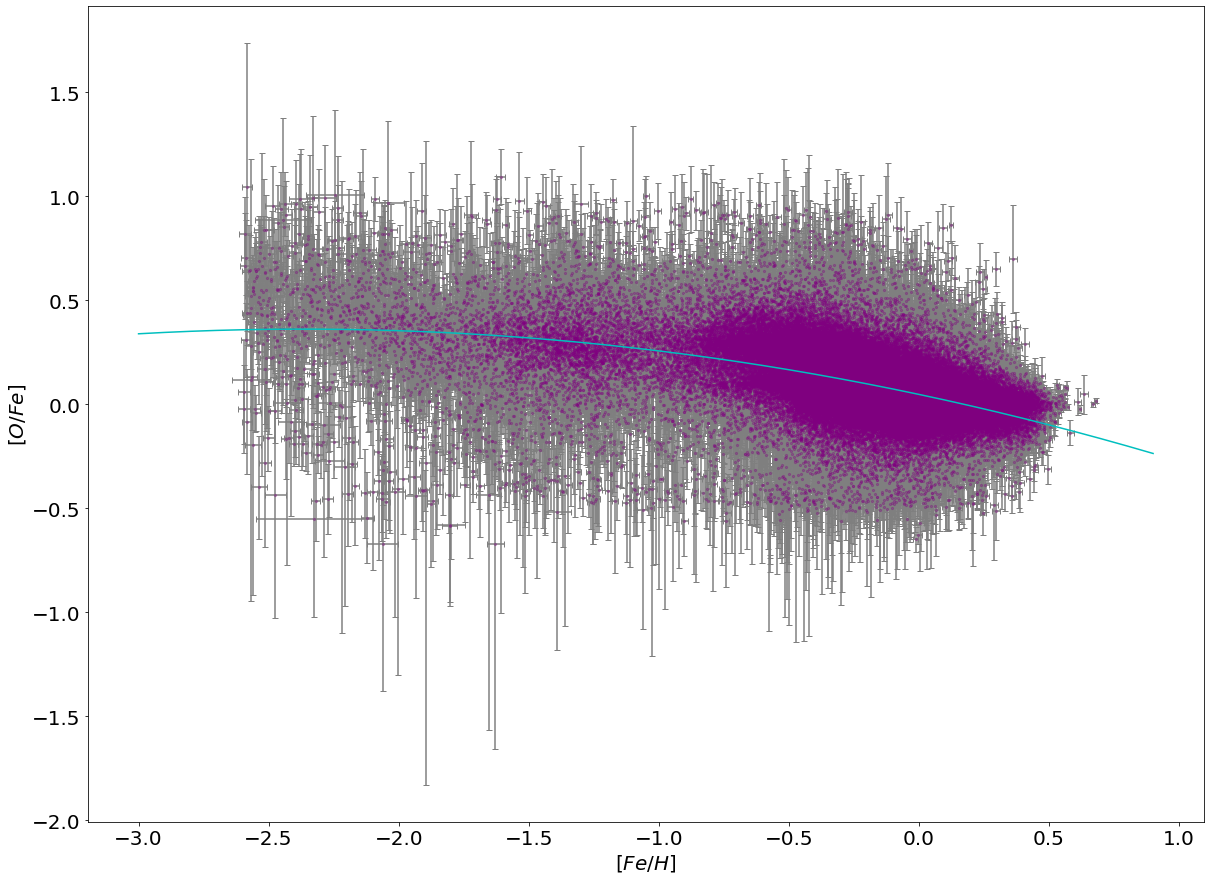

In [4]:
glat2_check = np.logical_or(star["GLAT"]<-10, star["GLAT"]>10)
#print(star["O_FE"])
fe_o_check = np.logical_and(star["FE_H"]>-6, np.abs(star["O_FE"])<9999)
fe_o_glat2_check = np.logical_and(glat2_check,fe_o_check)
indices2 = np.where(np.logical_and(gd, fe_o_glat2_check))
good2 = star[indices2]
#clean values without +/- 9999
#plane of the gal vals
FeHp_vals = good2["FE_H"]
OFep_vals = good2["O_FE"]
FeH_err   = good2["FE_H_ERR"]
OFe_err   = good2["O_FE_ERR"]

#fitting
G = [-1,1,0]
popt,pcov = mcFit3param(poly2, FeHp_vals, OFep_vals, FeH_err, OFe_err, G)
xfit_feh = np.arange(-3, 1,0.1)
print("BEST Poly2 Fit PARAMETERS:")
print("a=",popt[0],"$\pm$", pcov[0])
print("b=",popt[1],"$\pm$", pcov[1])
print("c=",popt[2],"$\pm$", pcov[2])
#PLOTTING
fig2 = plt.figure(figsize=(20,15))
ax2 = fig2.add_subplot(111)
ax2.scatter(FeHp_vals, OFep_vals, s=5, c="purple", alpha=0.3)
ax2.plot(xfit_feh,poly2(xfit_feh,*popt), c='c')
ax2.errorbar(FeHp_vals, OFep_vals, yerr=OFe_err, xerr=FeH_err, c='tab:gray', 
            fmt='.', markersize=1, capsize=3, zorder=0)
ax2.set_xlabel("$[Fe/H]$",size=20)
ax2.set_ylabel("$[O/Fe]$",size=20)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
plt.show()

MAIN POP. - BEST PLOY2 FIT PARAMETERS:
a= 0.0909094328331074 $\pm$ 0.004258630184852761
b= -0.10732905094569664 $\pm$ 0.00111361614223955
c= 0.04163117103993913 $\pm$ 0.00036878538642235906
2ND POP. BEST FIT PARAMETERS:
Slope= -0.014193395874477845 $\pm$ 0.004325550657840256
y-int= 0.2928094368873609 $\pm$ 0.0024317456918858623


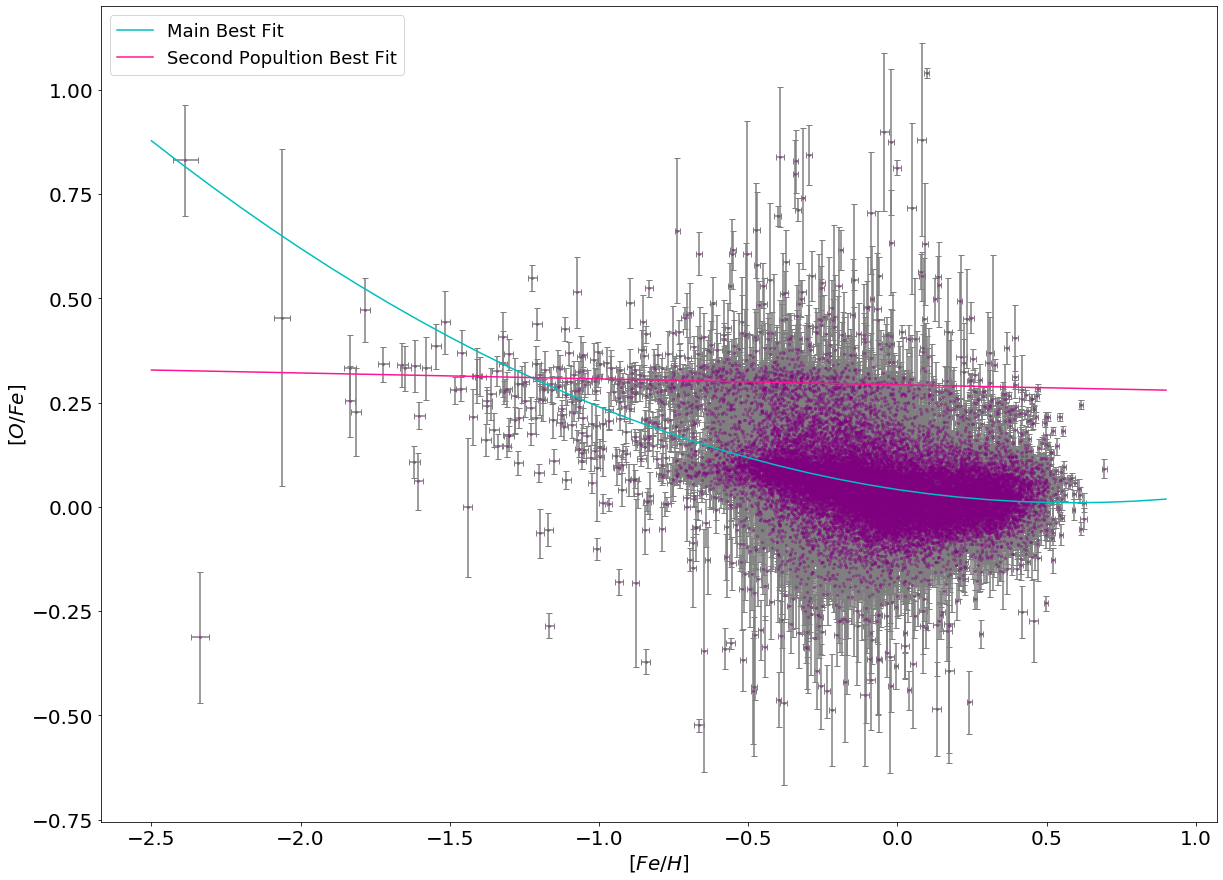

In [5]:
glat3_check = np.logical_and(star["GLAT"]>-2, star["GLAT"]<2)
fe_o_glat3_check = np.logical_and(glat3_check,fe_o_check)
indices3 = np.where(np.logical_and(gd, fe_o_glat3_check))
good3 = star[indices3]
#clean values without +/- 9999
#not the plane of the gal val
FeH_vals = good3["FE_H"]
OFe_vals = good3["O_FE"]
FeH_err2 = good3["Fe_H_ERR"]
OFe_err2 = good3["O_FE_ERR"]

#mask for second population
pop2m_check = np.logical_and(star["O_FE"]<0.4,star["O_FE"]>0.25)
allcheck =np.logical_and(pop2m_check, fe_o_glat3_check)
indicesp2 = np.where(np.logical_and(gd,allcheck))
pop2 = star[indicesp2]
pop2_feh = pop2["FE_H"]
pop2_ofe = pop2["O_FE"]
p2_feh_err = pop2["FE_H_ERR"]
p2_ofe_err = pop2["O_FE_ERR"]

#fitting
G2 = [1,1,0]
popt,pcov = mcFit3param(poly2, FeH_vals, OFe_vals, FeH_err2, OFe_err2, G)
xfit_Feh = np.arange(-2.5, 1,0.1)
print("MAIN POP. - BEST PLOY2 FIT PARAMETERS:")
print("a=",popt[0],"$\pm$", pcov[0])
print("b=",popt[1],"$\pm$", pcov[1])
print("c=",popt[2],"$\pm$", pcov[2])
#fitting population 2
poptp,pcovp = mcFitLine(pop2_feh, pop2_ofe, p2_feh_err, p2_ofe_err)
x_fitspop2 = np.arange(-2.5,1,0.1)
print("2ND POP. BEST FIT PARAMETERS:")
print("Slope=",poptp[0],"$\pm$", pcovp[0])
print("y-int=",poptp[1],"$\pm$", pcovp[1])

#PLOTTING
fig3 = plt.figure(figsize=(20,15))
ax3 = fig3.add_subplot(111)
ax3.scatter(FeH_vals, OFe_vals, s=5, c="purple", alpha=0.3)
ax3.plot(xfit_Feh,poly2(xfit_Feh,*popt), c='c', label="Main Best Fit" )
ax3.plot(x_fitspop2,linear(x_fitspop2, *poptp), c='deeppink',label="Second Popultion Best Fit")
ax3.errorbar(FeH_vals, OFe_vals, yerr=OFe_err2, xerr=FeH_err2, c='tab:gray', 
            fmt='.', markersize=1, capsize=3, zorder=0)
ax3.set_xlabel("$[Fe/H]$",size=20)
ax3.set_ylabel("$[O/Fe]$",size=20)
ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
plt.legend(loc='best', fontsize=18)
plt.show()

BEST POLY2 FIT PARAMETERS:
a= 3.6619327579632984e-08 $\pm$ 1.7387646273808487e-10
b= -0.0006668434470068776 $\pm$ 1.8253262589671046e-06
c= 3.0179592580387355 $\pm$ 0.004723050456812231


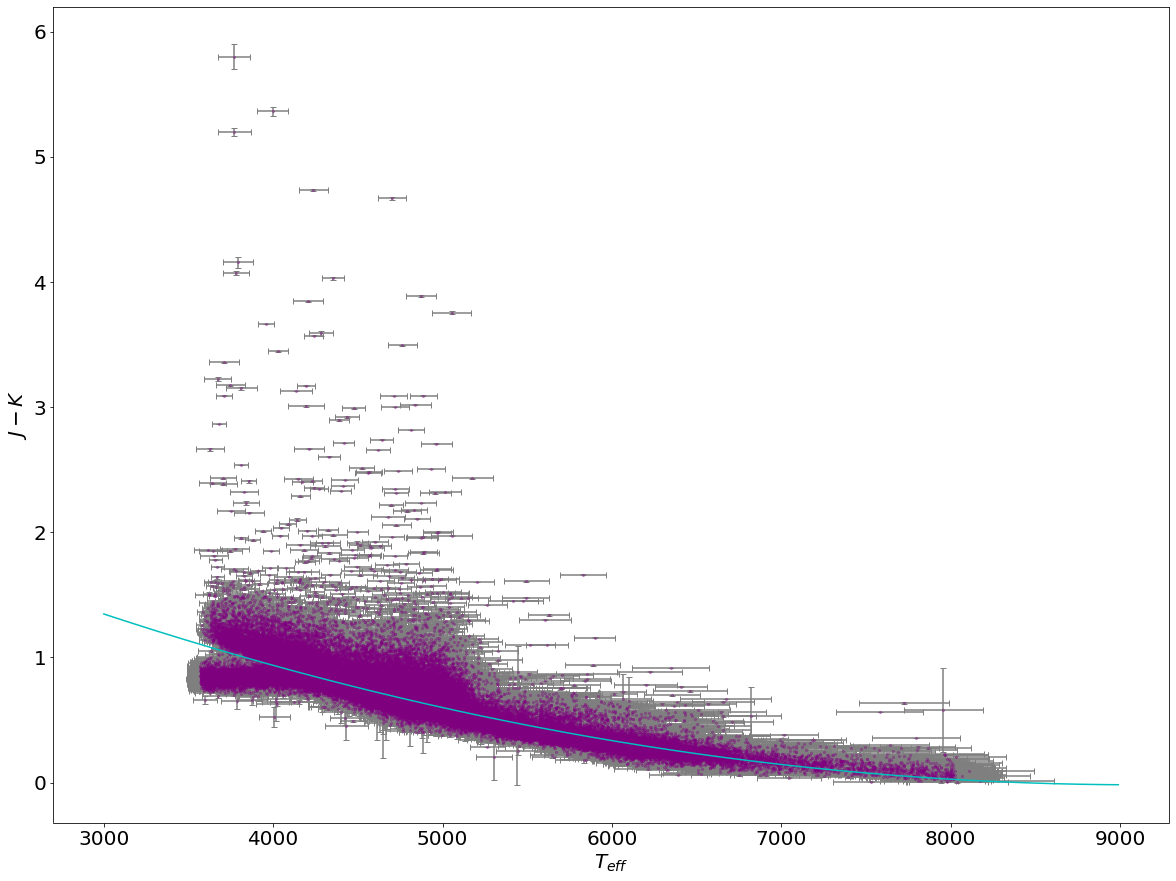

In [6]:
#print(star_hdus[1].columns)
#print(star["K"])
#print(star["J"])
jkvals_check = np.logical_and((star["J"]-star["K"])>0, (star["J"]-star["K"]<1000))
jkerr_check = np.logical_and((star["J_ERR"]-star["K_ERR"])<5,(star["J_ERR"]-star["K_ERR"])>-5)
jk_check = np.logical_and(jkvals_check,jkerr_check)
jk_glat2_check = np.logical_and(glat2_check, jk_check)
jk_glat2_teff_check = np.logical_and(jk_glat2_check,star["TEFF"]>0)
indices4 = np.where(np.logical_and(gd, jk_glat2_teff_check))
good4 = star[indices4]

#applying my mask
Teff2_vals = good4["TEFF"]
Teff2_err  = good4["TEFF_ERR"]
j_vals = good4["J"]
k_vals = good4["K"]
j_err  = good4["J_ERR"]
k_err  = good4["K_ERR"]

#best fit
go=[1,0,3]
popt,pcov = mcFit3param(poly2, Teff2_vals, j_vals-k_vals, Teff2_err, j_err-k_err, go)
xfit_teff = np.arange(3000,9000,10)
print("BEST POLY2 FIT PARAMETERS:")
print("a=",popt[0],"$\pm$", pcov[0])
print("b=",popt[1],"$\pm$", pcov[1])
print("c=",popt[2],"$\pm$", pcov[2])

#plotting
fig4 = plt.figure(figsize=(20,15))
ax4 = fig4.add_subplot(111)
ax4.scatter(Teff2_vals, j_vals-k_vals, s=5, c="purple", alpha=0.3)
ax4.plot(xfit_teff,poly2(xfit_teff,*popt), c="c")
ax4.errorbar(Teff2_vals, j_vals-k_vals, yerr=j_err-k_err, xerr=Teff2_err, c='tab:gray', 
            fmt='.', markersize=1, capsize=3, zorder=0)
ax4.set_xlabel("$T_{eff}$",size=20)
ax4.set_ylabel("$J-K$",size=20)
ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
plt.show()

BEST FIT PARAMETERS:
a= 49.90459845704774 $\pm$ 0.001145275254646382
b= 0.03221960488724199 $\pm$ 6.386701516440596e-07
c= -0.5597370263756302 $\pm$ 0.00010967877447130275
d= -15.433256723088304 $\pm$ 0.0012702785613232924


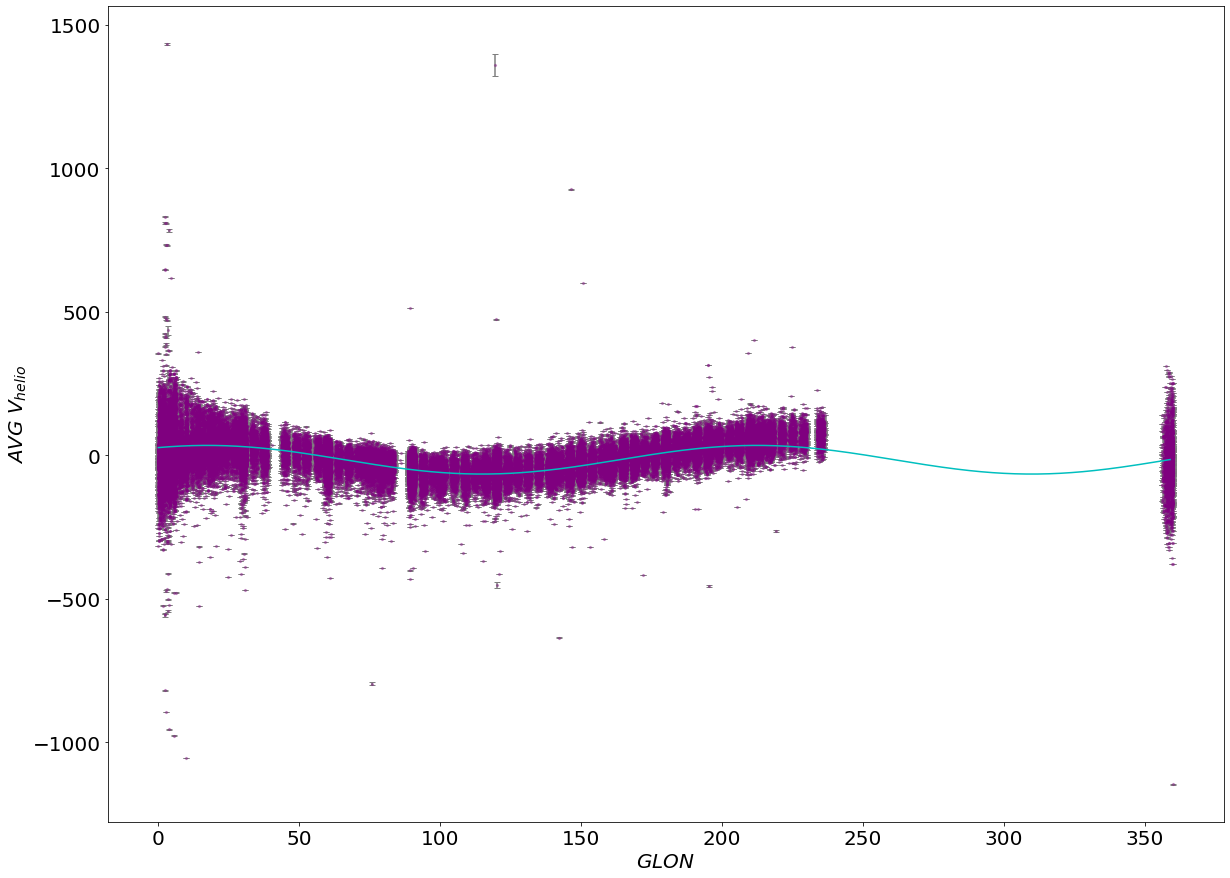

In [7]:
glat3_check = np.logical_and(star["GLAT"]>-10,star["GLAT"]<10)
indices5 = np.where(np.logical_and(gd, glat3_check))
good5 = star[indices5]

#applying mask
glon_vals = good5["GLON"]
vhelio_avg = good5["VHELIO_AVG"]
vhelio_err = good5["VERR"]

#best fit
guess = [250,np.pi/100,0,10]
popt,pcov = mcFit4param(cosfit, glon_vals, vhelio_avg, 0,vhelio_err, guess)
xfit_v = np.arange(0,360,1)
print("BEST FIT PARAMETERS:")
print("a=",popt[0],"$\pm$", pcov[0])
print("b=",popt[1],"$\pm$", pcov[1])
print("c=",popt[2],"$\pm$", pcov[2])
print("d=",popt[3],"$\pm$", pcov[3])
#plotting
fig5 = plt.figure(figsize=(20,15))
ax5 = fig5.add_subplot(111)
ax5.scatter(glon_vals, vhelio_avg, s=5, c="purple", alpha=0.3)
ax5.plot(xfit_v,cosfit(xfit_v,*popt), c="c")
ax5.errorbar(glon_vals, vhelio_avg, yerr=vhelio_err, c='tab:gray', 
            fmt='.', markersize=1, capsize=3, zorder=0)
ax5.set_xlabel("$GLON$",size=20)
ax5.set_ylabel("$AVG$ $V_{helio}$",size=20)
ax5.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)
plt.show()

BEST FIT PARAMETERS:
a= 0.12487369498118685 $\pm$ 0.00041214506478806043
b= 1.3736034070062724 $\pm$ 0.0017212080336091722
c= 5.534991397239537 $\pm$ 0.007267172989870037
d= 0.41819120334675314 $\pm$ 0.0004301447663819425
BEST POLY2 FIT PARAMETERS:
a= -0.0031852468526289064 $\pm$ 6.975938065030045e-06
b= 0.13509958135181907 $\pm$ 0.00020050214364928002
c= 0.022146819600222068 $\pm$ 0.0007548592626914916
BEST LINEAR FIT PARAMETERS:
Slope= 0.06465181781552883 $\pm$ 5.999437620044145e-05
y-int= 0.19851388165918674 $\pm$ 0.00043424764570314304


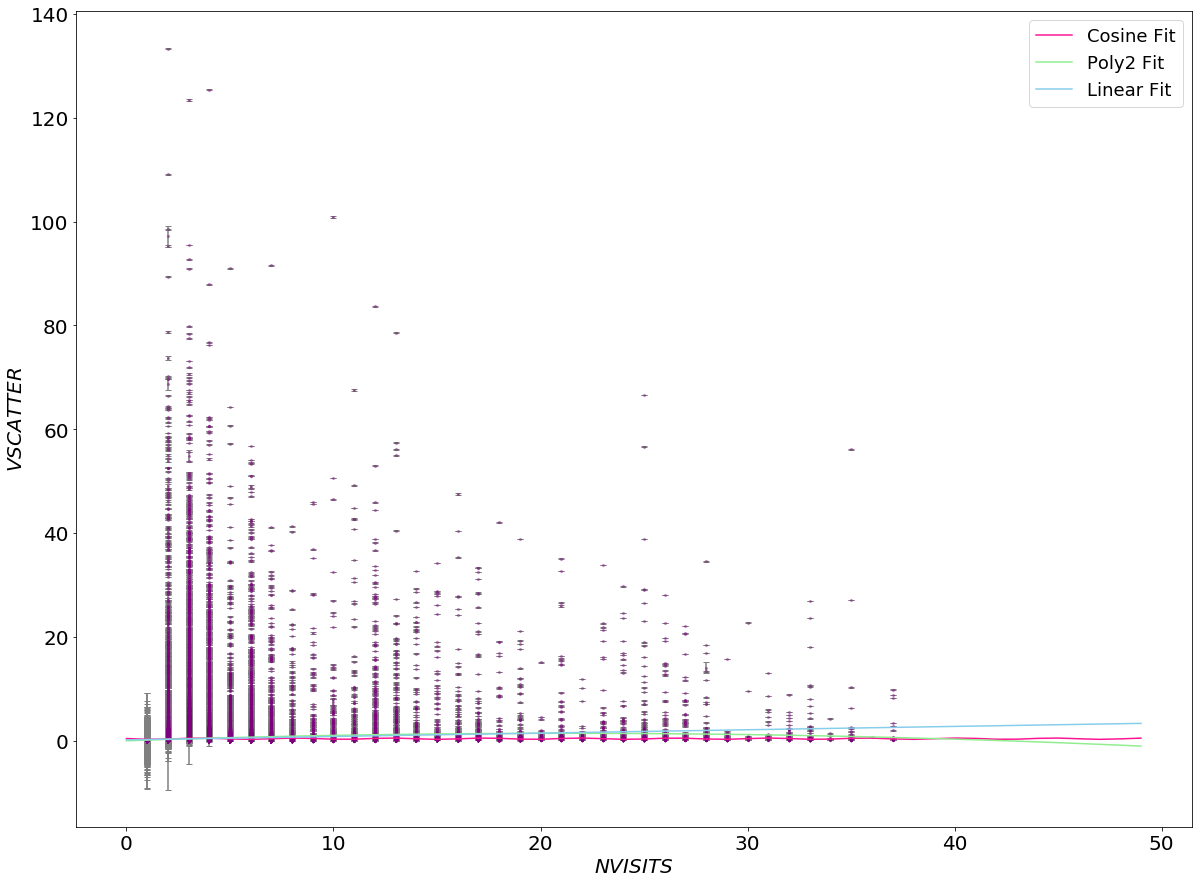

In [15]:
v_check = np.logical_and(np.abs(star["VERR"])<10,star["VSCATTER"]<200)
indices6 = np.where(np.logical_and(gd, v_check))
good6 = star[indices6]

nvis = good6["NVISITS"]
vscat = good6["VSCATTER"]
v_err = good6["VERR"]

#line fitting
guess = [140,np.pi/2,5,100]
popt1,pcov1 = mcFit4param(cosfit, nvis, vscat, 0,v_err, guess)
xfit_vs = np.arange(0,50,1)
print("BEST FIT PARAMETERS:")
print("a=",popt1[0],"$\pm$", pcov1[0])
print("b=",popt1[1],"$\pm$", pcov1[1])
print("c=",popt1[2],"$\pm$", pcov1[2])
print("d=",popt1[3],"$\pm$", pcov1[3])

go=[1,5,3]
popt2,pcov2 = mcFit3param(poly2, nvis, vscat, 0, v_err, go)
print("BEST POLY2 FIT PARAMETERS:")
print("a=",popt2[0],"$\pm$", pcov2[0])
print("b=",popt2[1],"$\pm$", pcov2[1])
print("c=",popt2[2],"$\pm$", pcov2[2])

popt3,pcov3 = mcFitLine(nvis, vscat, 0, v_err)
print("BEST LINEAR FIT PARAMETERS:")
print("Slope=",popt3[0],"$\pm$", pcov3[0])
print("y-int=",popt3[1],"$\pm$", pcov3[1])

#plotting
fig6 = plt.figure(figsize=(20,15))
ax6 = fig6.add_subplot(111)
ax6.scatter(nvis, vscat, s=5, c="purple", alpha=0.3)
ax6.plot(xfit_vs, cosfit(xfit_vs, *popt1),c="deeppink",label="Cosine Fit")
ax6.plot(xfit_vs, poly2(xfit_vs,*popt2), c="lightgreen",label="Poly2 Fit")
ax6.plot(xfit_vs, linear(xfit_vs,*popt3), c="skyblue", label="Linear Fit")
ax6.errorbar(nvis, vscat, yerr=v_err, c='tab:gray', 
            fmt='.', markersize=1, capsize=3, zorder=0)
ax6.set_xlabel("$NVISITS$",size=20)
ax6.set_ylabel("$VSCATTER$",size=20)
ax6.xaxis.set_tick_params(labelsize=20)
ax6.yaxis.set_tick_params(labelsize=20)
plt.legend(loc='best', fontsize=18)
plt.show()

BEST COSINE FIT PARAMETERS:
a= -0.03582878479848692 $\pm$ 0.00016916532116118904
b= 4.359160420800347 $\pm$ 0.011355393933060278
c= 0.05214261818055092 $\pm$ 0.00259006735377468
d= 0.03904616446455635 $\pm$ 0.00015366779449873123
BEST LINEAR FIT PARAMETERS:
Slope= -0.01461117904045177 $\pm$ 0.004436416582566415
y-int= 0.2924658274179588 $\pm$ 0.0024596663101951457


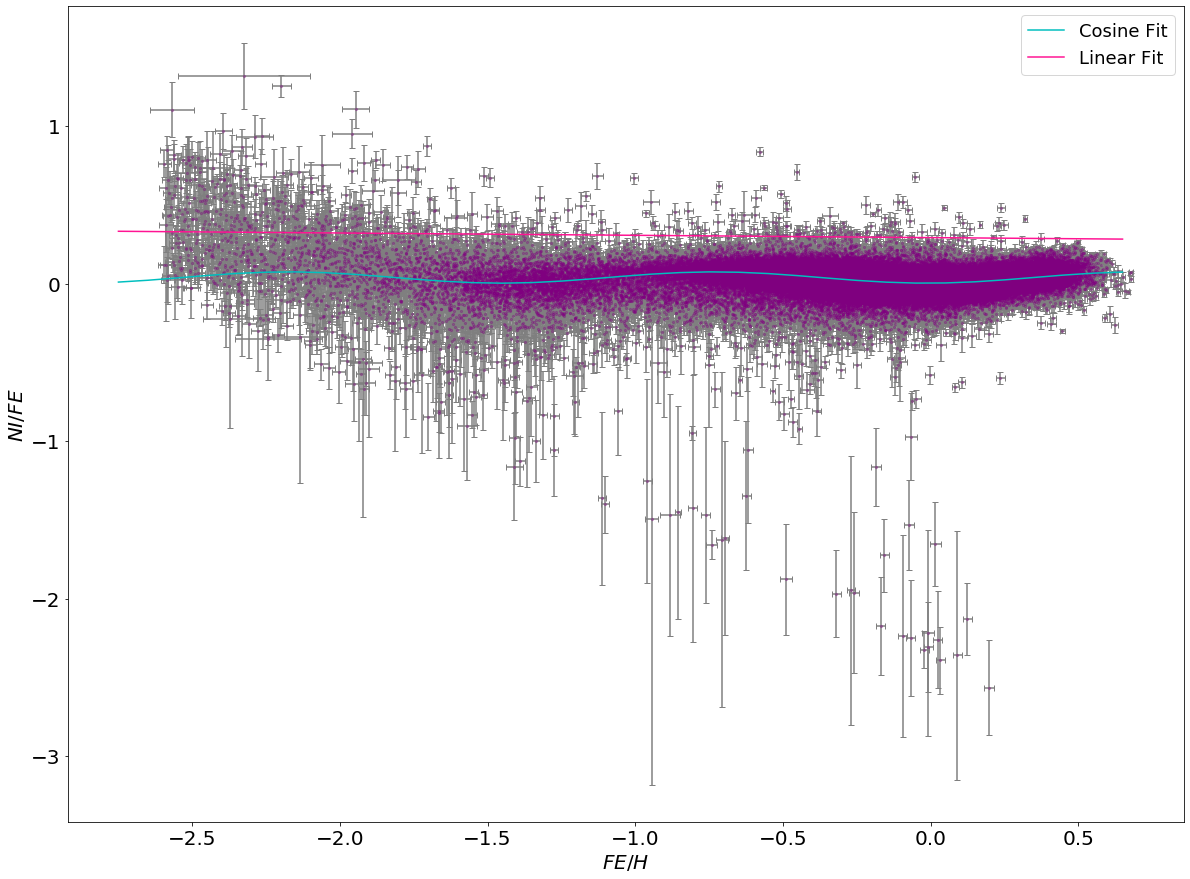

In [9]:
fe_ni_check = np.logical_and(star["FE_H"]>-6, np.abs(star["NI_FE"])<9999)
indices7 = np.where(np.logical_and(gd, fe_ni_check))
good7 = star[indices7]

fe_hVals = good7["FE_H"]
ni_feVals = good7["NI_FE"]
feh_err = good7["FE_H_ERR"]
nife_err = good7["NI_FE_ERR"]

guess = [0.5,np.pi/10,0,100]
popt,pcov = mcFit4param(cosfit, fe_hVals, ni_feVals, feh_err, nife_err, guess)
xfit_nf = np.arange(-2.75,0.75,0.1)
print("BEST COSINE FIT PARAMETERS:")
print("a=",popt[0],"$\pm$", pcov[0])
print("b=",popt[1],"$\pm$", pcov[1])
print("c=",popt[2],"$\pm$", pcov[2])
print("d=",popt[3],"$\pm$", pcov[3])

poptl,pcovl = mcFitLine(pop2_feh, pop2_ofe, p2_feh_err, p2_ofe_err)
print("BEST LINEAR FIT PARAMETERS:")
print("Slope=",poptl[0],"$\pm$", pcovl[0])
print("y-int=",poptl[1],"$\pm$", pcovl[1])

#plotting
fig7 = plt.figure(figsize=(20,15))
ax7 = fig7.add_subplot(111)
ax7.scatter(fe_hVals, ni_feVals, s=5, c="purple", alpha=0.3)
ax7.plot(xfit_nf,cosfit(xfit_nf,*popt), c="c", label="Cosine Fit")
ax7.plot(xfit_nf,linear(xfit_nf,*poptl), c="deeppink", label="Linear Fit")
ax7.errorbar(fe_hVals, ni_feVals, yerr=nife_err, xerr=feh_err, c='tab:gray', 
            fmt='.', markersize=1, capsize=3, zorder=0)
ax7.set_xlabel("$FE/H$",size=20)
ax7.set_ylabel("$NI/FE$",size=20)
ax7.xaxis.set_tick_params(labelsize=20)
ax7.yaxis.set_tick_params(labelsize=20)
plt.legend(loc='best', fontsize=18)
plt.show()

In [10]:
#error bar format:
# ax.errorbar(data['X'], data['Y'], yerr=data['Y_ERR'], xerr=0.5, c='tab:gray', 
#             fmt='.', markersize=1, capsize=3, zorder=0)